# DRRT star test

In [2]:
%load_ext autoreload
%autoreload 2

San check with one agent

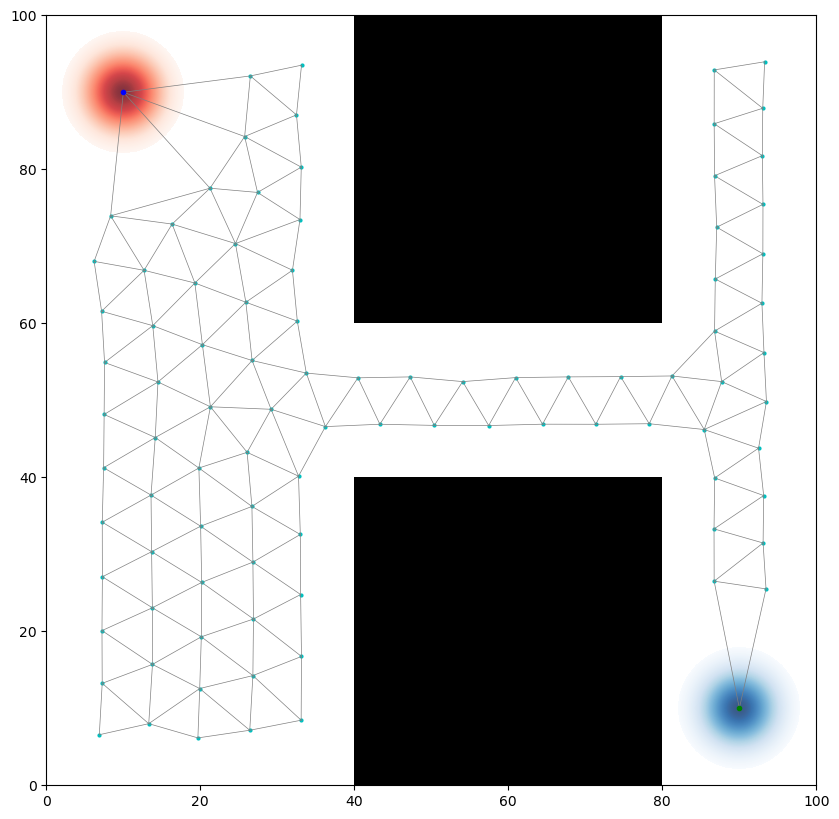

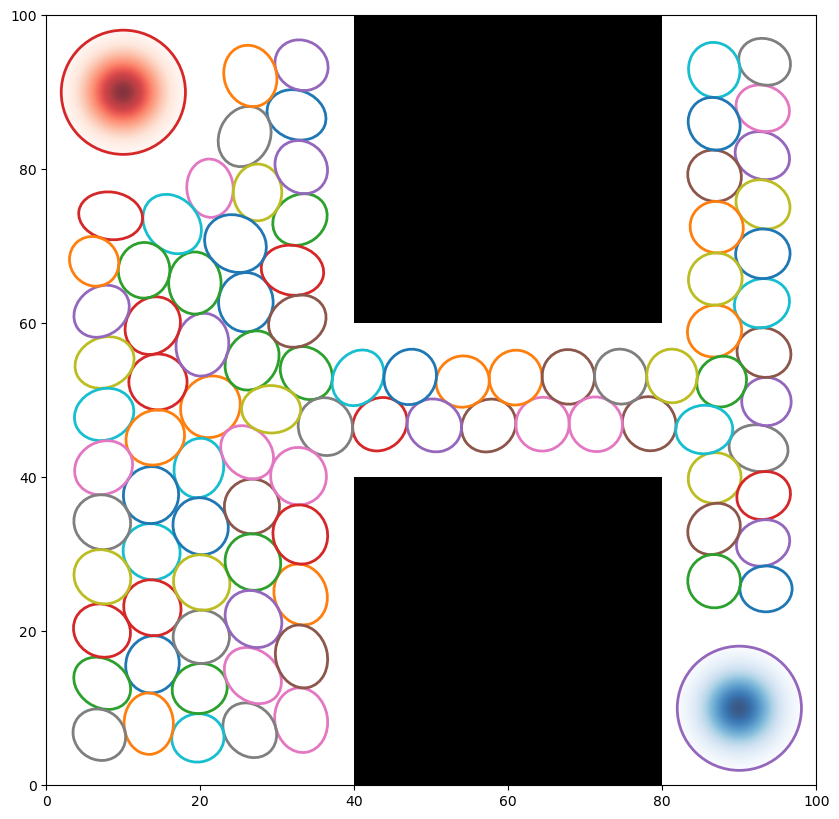

In [3]:
from swarm_prm.utils.gaussian_prm import *
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

roadmap = Roadmap(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(40, 0), (40, 40), (80, 40), (80, 0)]),
    Obstacle(None, "POLYGON", [(40, 100), (40, 60), (80, 60), (80, 100)])
]
num_samples = 100 
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agents = 1
agent_radius = 2
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 4
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 90]])
goals = np.array([[90, 10]])

starts_weight = np.array([1])
goals_weight = np.array([1])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", 10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", 10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)

gaussian_prm.sample_free_space("CVT", "CVAR")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", radius=30)
gaussian_prm.visualize_roadmap()
gaussian_prm.visualize_g_nodes()

import pickle

with open("solutions/drrt_single_agent_roadmap.pkl", "wb") as f:
    pickle.dump(gaussian_prm, f)

In [4]:
import pickle
from swarm_prm.solvers.macro.drrt_star import DRRT_Star

with open("solutions/drrt_single_agent_roadmap.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

num_agents = 1
agent_radius = 1

drrt_solver = DRRT_Star(gaussian_prm, num_agents, agent_radius)
path, cost= drrt_solver.get_solution()

Cost:  138.78739653994256


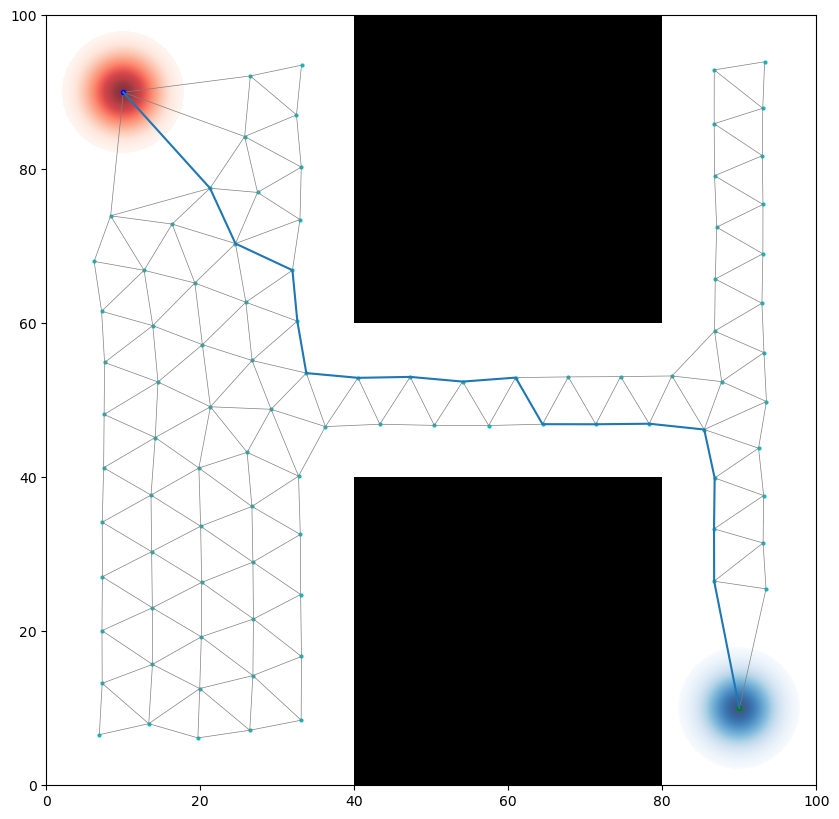

In [5]:
import matplotlib.pyplot as plt

fig, ax = gaussian_prm.visualize_roadmap()

for agent in range(num_agents):
    locations = [gaussian_prm.samples[location_idx[0]] for location_idx in path]
    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    ax.plot(x, y, "-")

plt.show()

Multi-agent DRRT

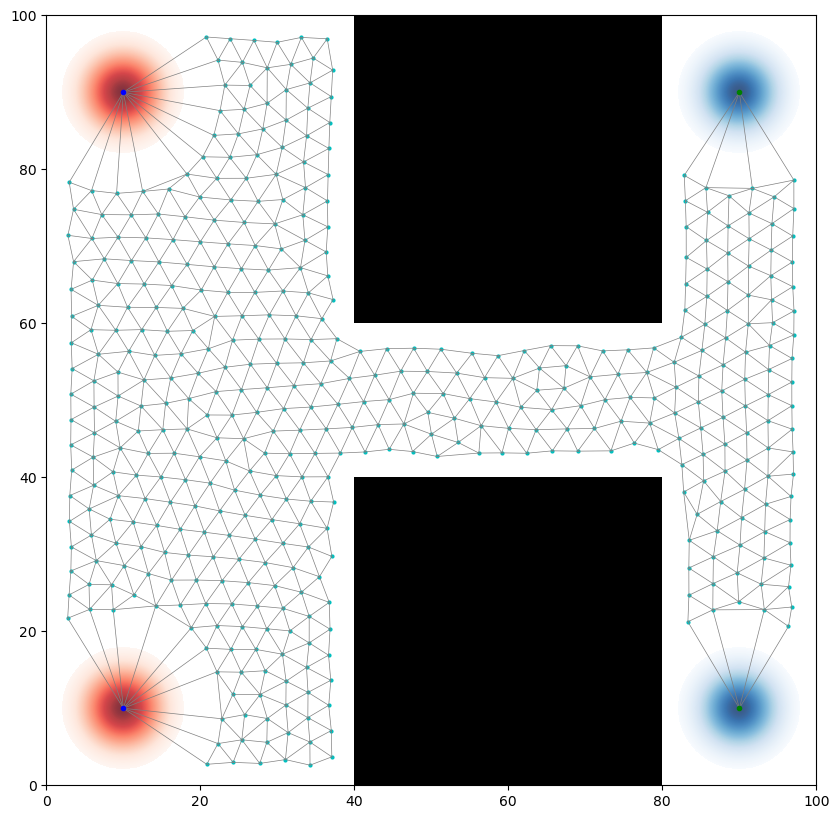

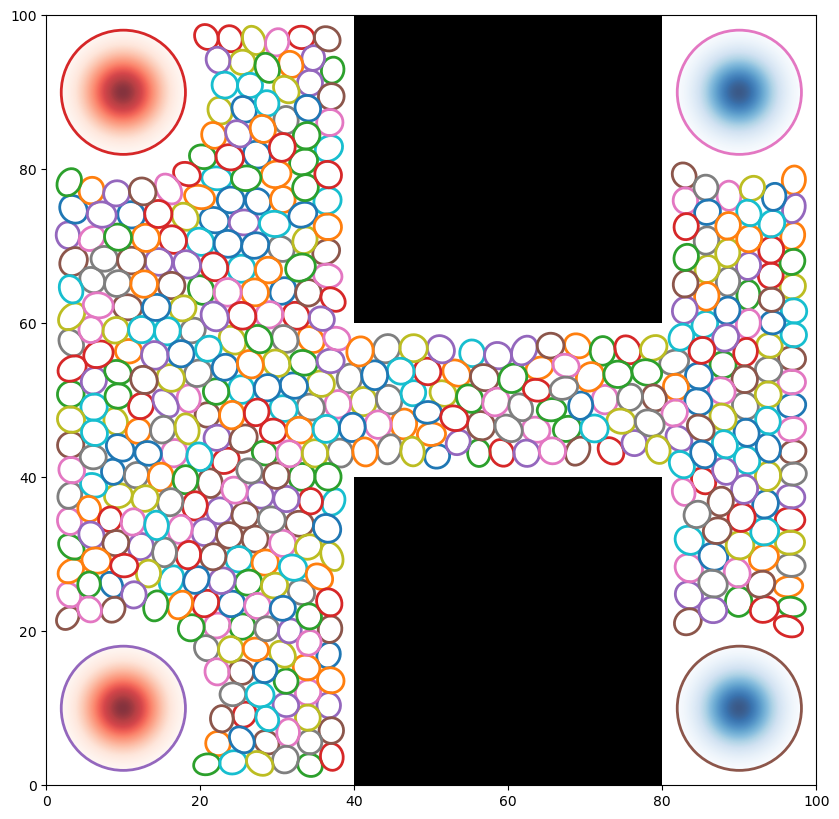

In [13]:
from swarm_prm.utils.gaussian_prm import *
from swarm_prm.envs.roadmap import Roadmap, Obstacle 
from swarm_prm.envs.instance import Instance

roadmap = Roadmap(100, 100)
safety_radius = 2 
pos = np.array([50, 50])
obstacles  = [
    Obstacle(None, "POLYGON", [(40, 0), (40, 40), (80, 40), (80, 0)]),
    Obstacle(None, "POLYGON", [(40, 100), (40, 60), (80, 60), (80, 100)])
]
num_samples = 500
for obs in obstacles:
    roadmap.add_obstacle(obs)
# fig, ax = roadmap.visualize()
start_mean = np.random.rand(2) * 100
goal_mean = np.random.rand(2) * 100

# Agent config
num_agent = 2
agent_radius = 1
sampling_method = "GAUSSIAN_SAMPLING"
#sampling_method = "SWARMPRM_SAMPLING"
hex_radius = 4
TEST_CVAR = False


# Curated test instance
starts = np.array([[10, 90], [10, 10]])
goals = np.array([[90, 10], [90, 90]])

starts_weight = np.array([.5, .5])
goals_weight = np.array([.5, .5])

g_starts = [GaussianGraphNode(start, None, "UNIFORM", 10) for start in starts]
g_goals = [GaussianGraphNode(goal, None, "UNIFORM", 10) for goal in goals]

instance = Instance(roadmap, g_starts, g_goals, starts_weight, goals_weight)

gaussian_prm = GaussianPRM(instance, num_samples, safety_radius=safety_radius,
                           hex_radius=hex_radius)

gaussian_prm.sample_free_space("CVT", "CVAR")
gaussian_prm.load_instance()
gaussian_prm.build_roadmap(roadmap_method="TRIANGULATION", radius=50)
gaussian_prm.visualize_roadmap()
gaussian_prm.visualize_g_nodes()

import pickle

with open("solutions/drrt_multi_agent_roadmap.pkl", "wb") as f:
    pickle.dump(gaussian_prm, f)

In [14]:
import pickle
from swarm_prm.solvers.macro.drrt_star import DRRT_Star
from swarm_prm.solvers.macro.mcf import TEG_MCF


with open("solutions/drrt_multi_agent_roadmap.pkl", "rb") as f:
    gaussian_prm = pickle.load(f)

num_agents = 2
agent_radius = 2

drrt_solver = DRRT_Star(gaussian_prm, num_agents, agent_radius, max_time=10)
path, cost= drrt_solver.get_solution()

# teg_solver = TEG_MCF(gaussian_prm, num_agents, agent_radius)
# teg_solver.get_earliest_timestep()


Cost:  248.80594869190793


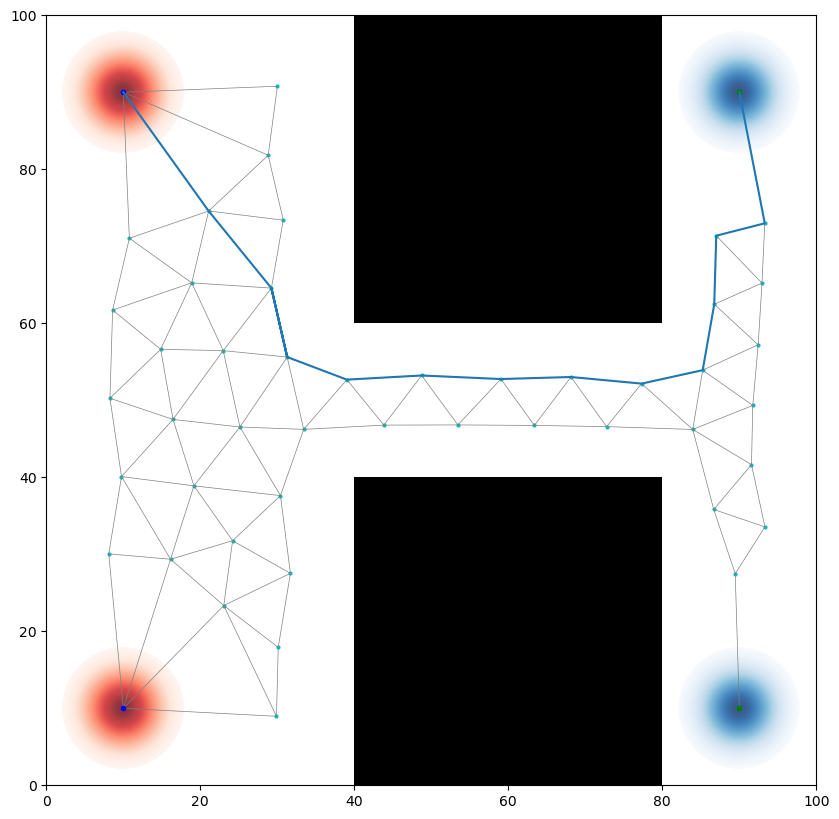

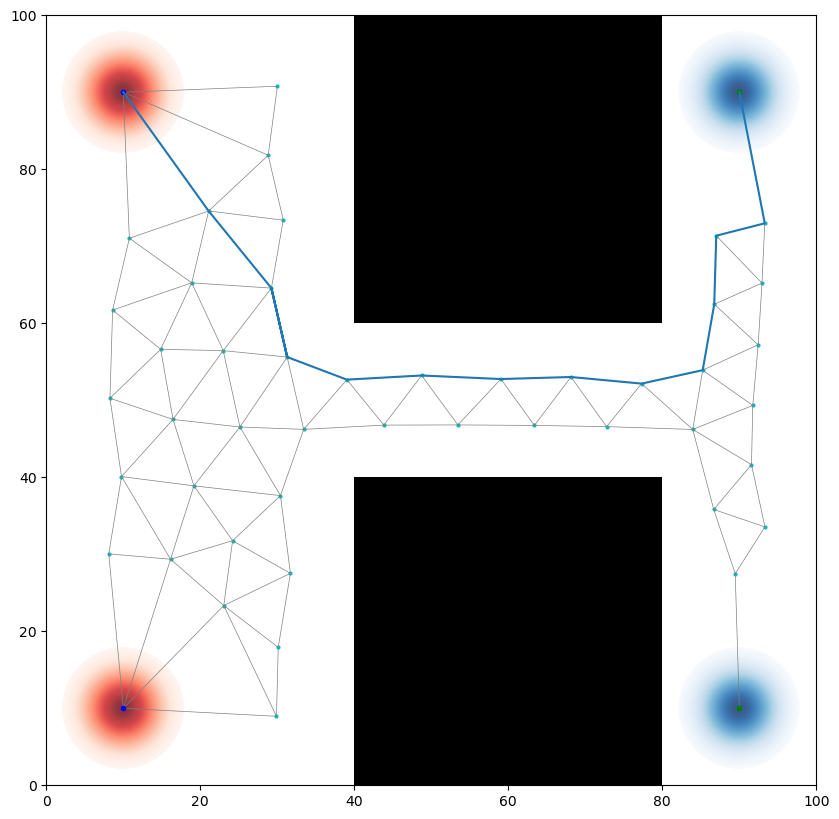

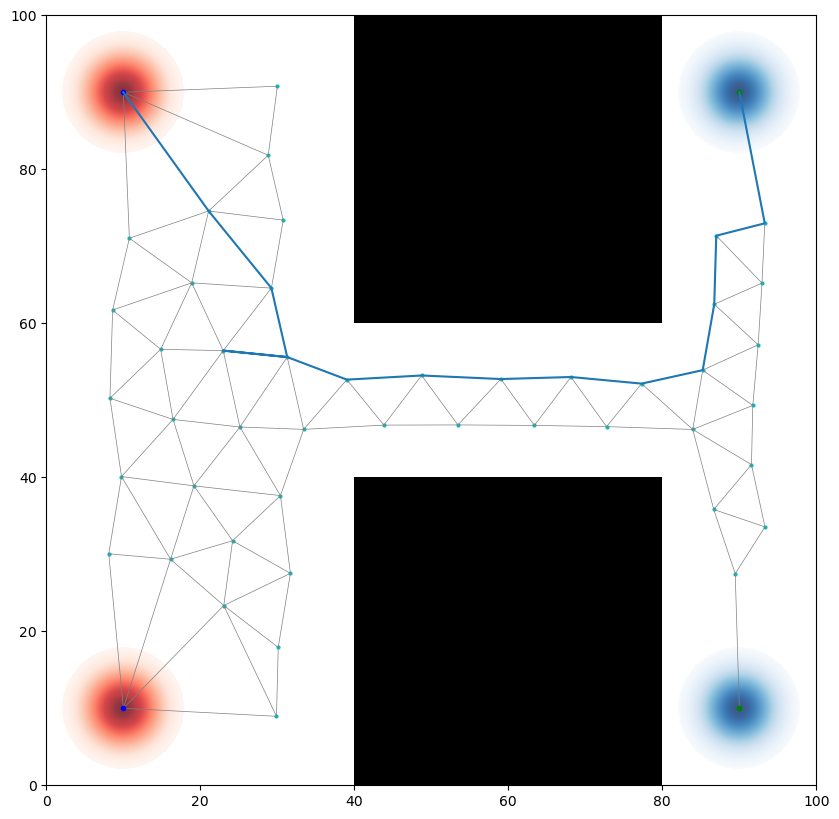

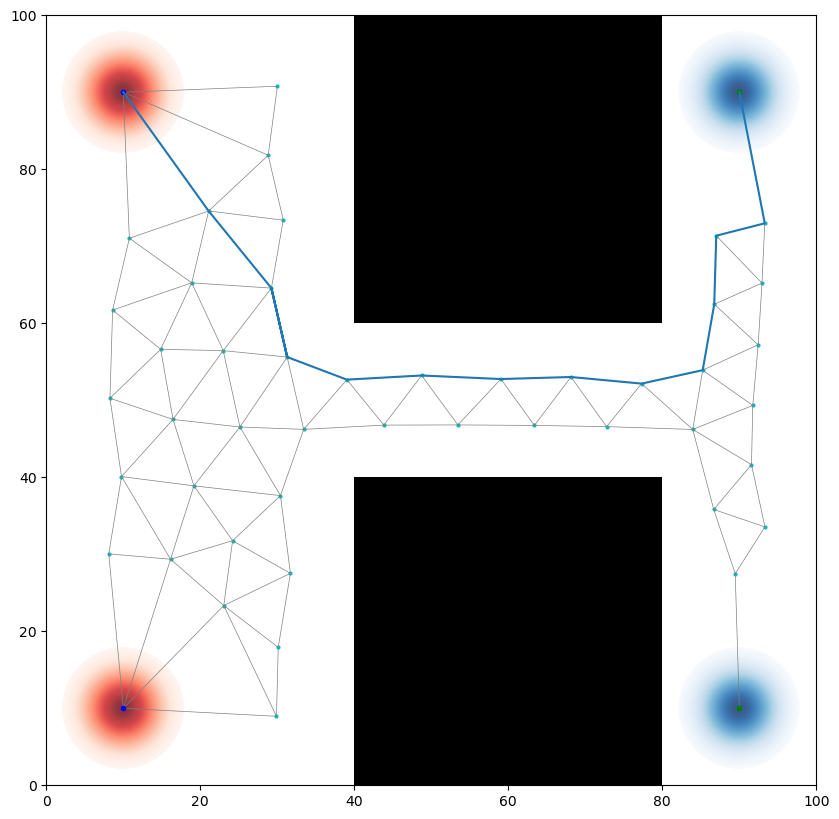

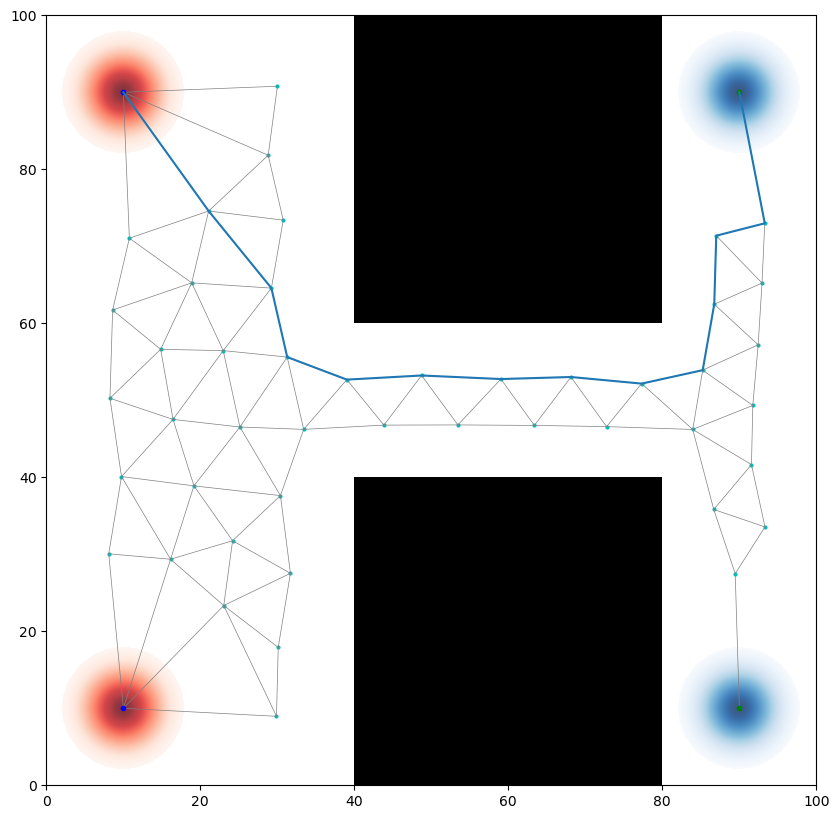

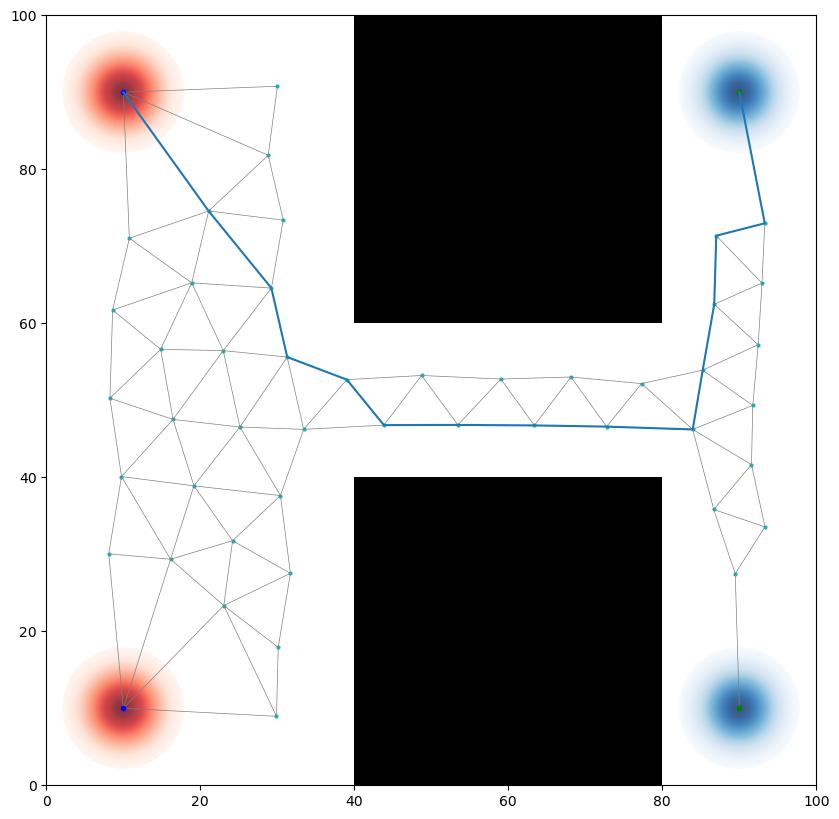

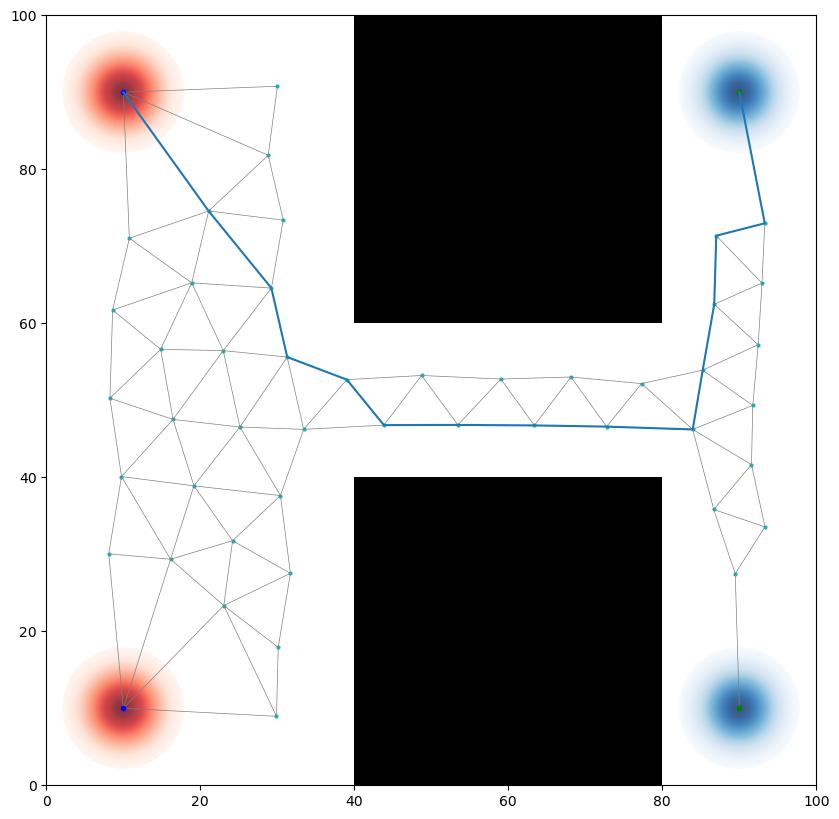

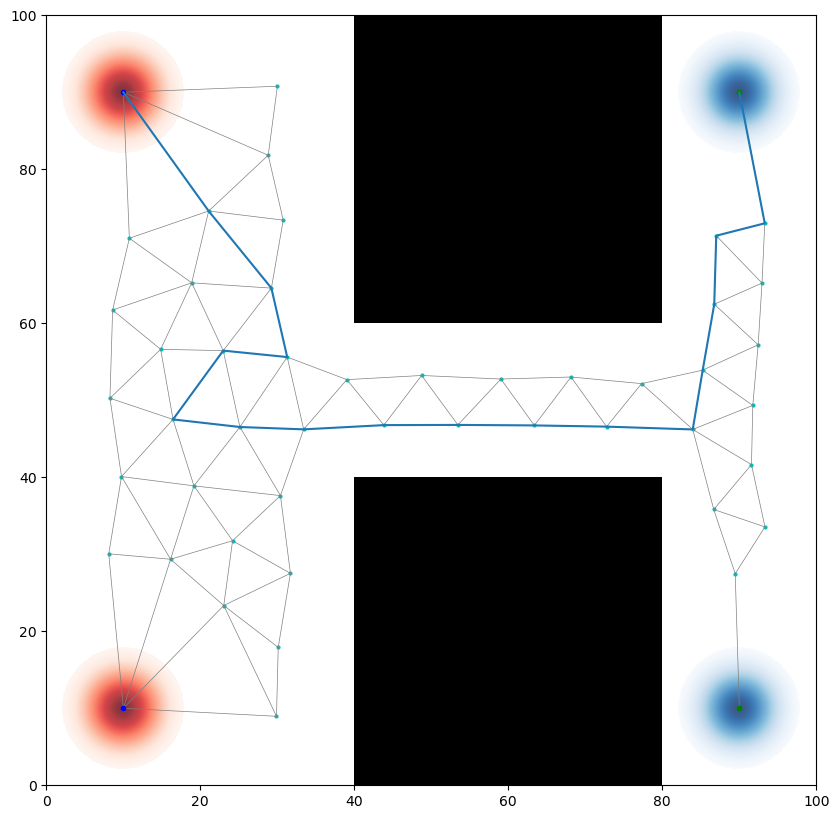

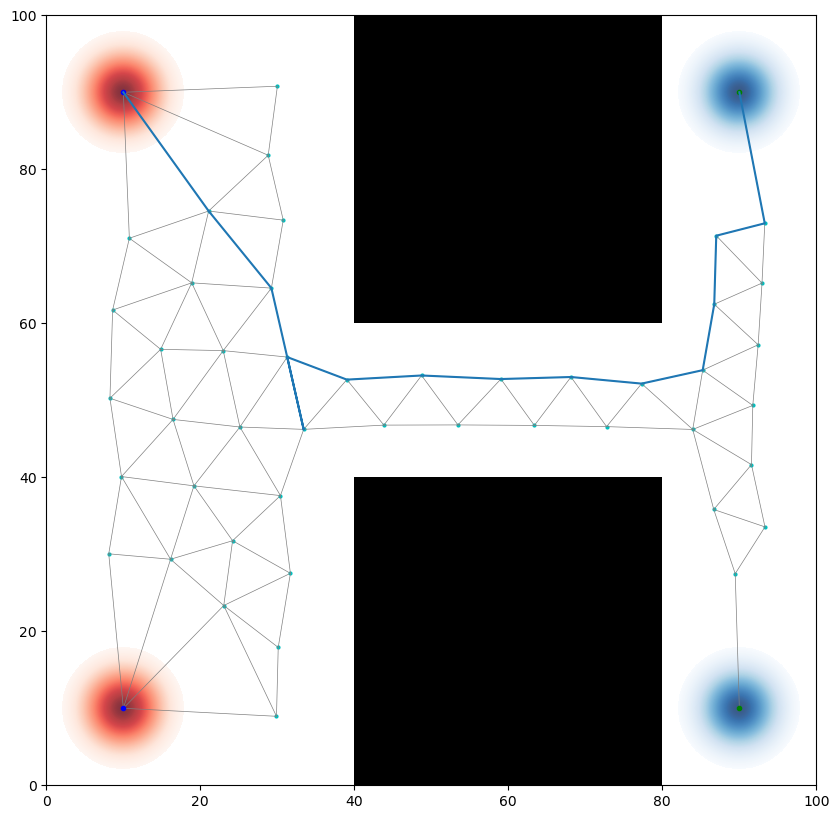

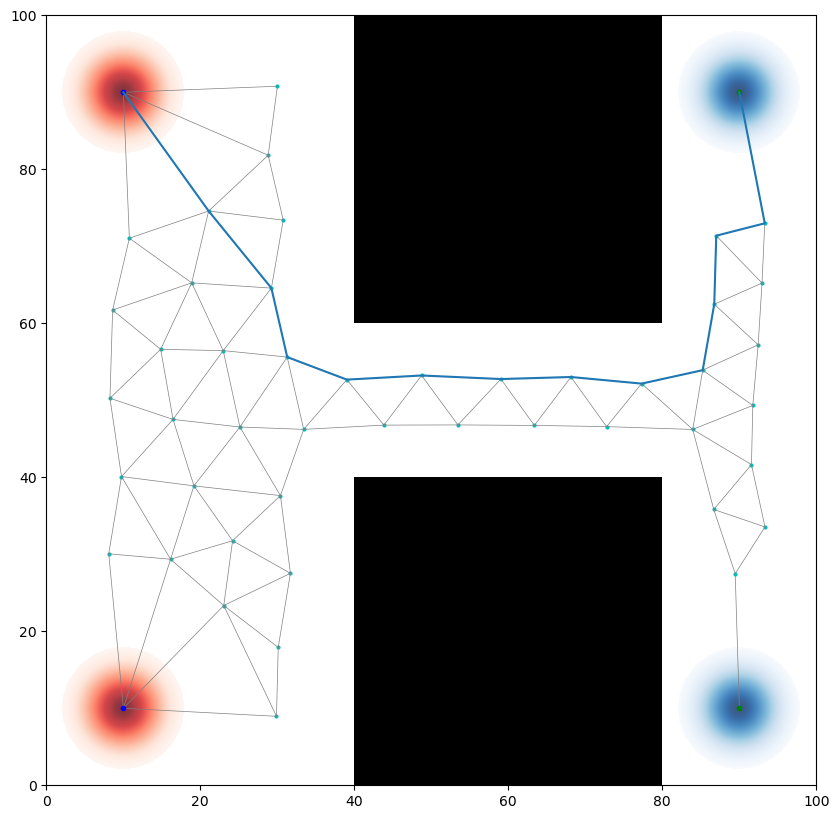

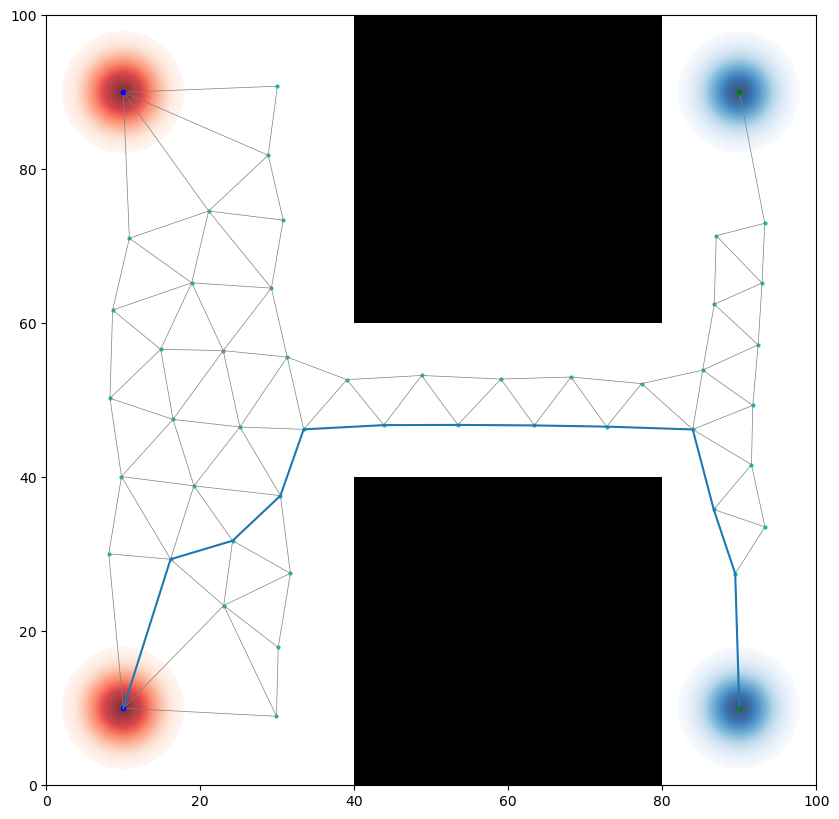

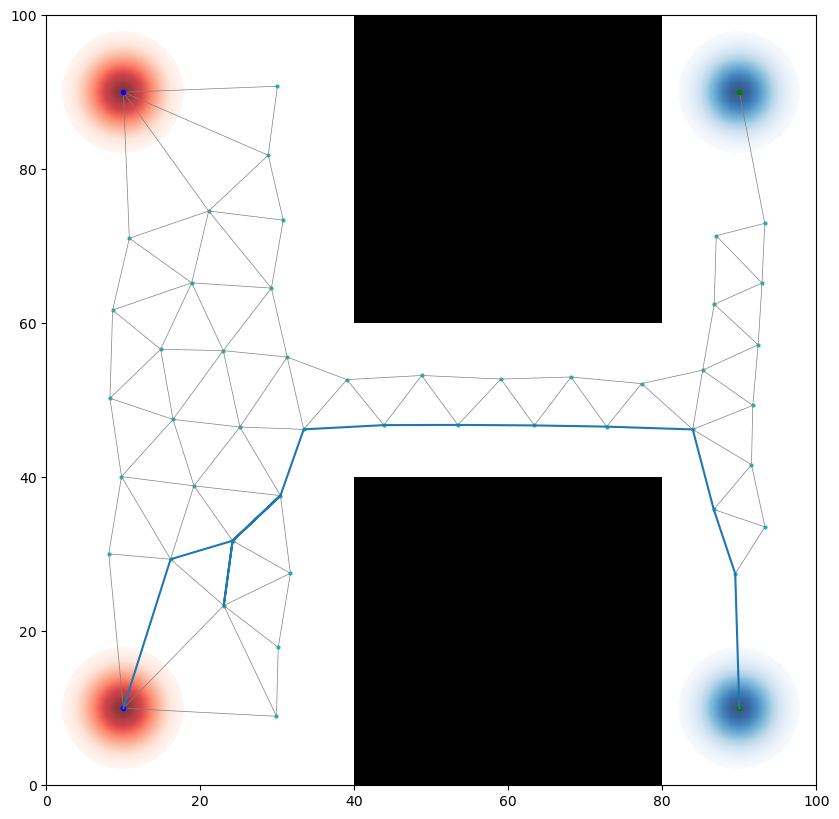

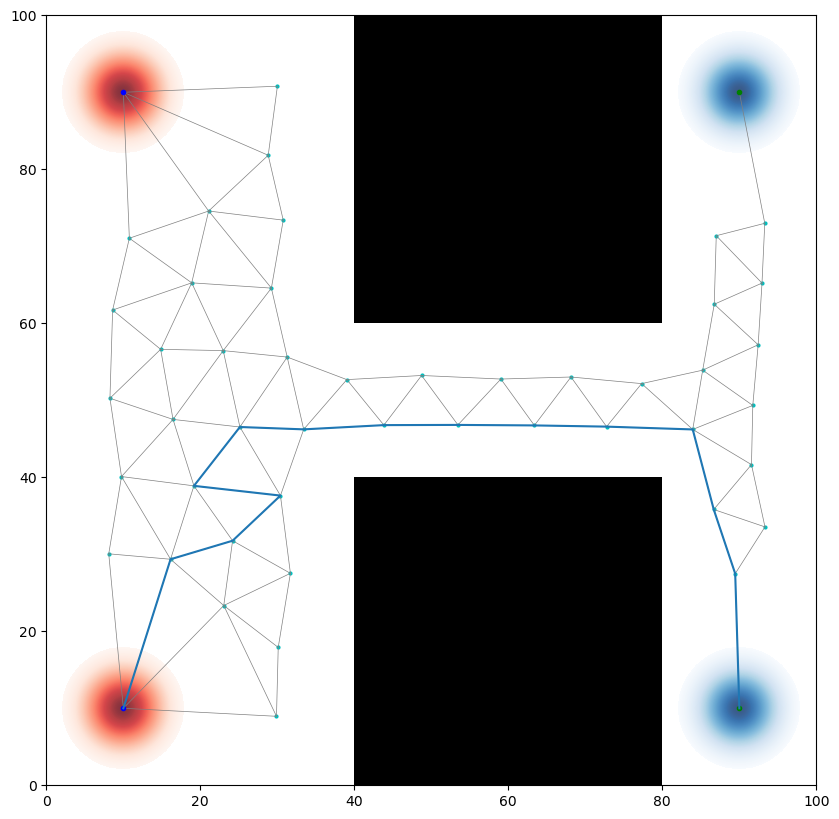

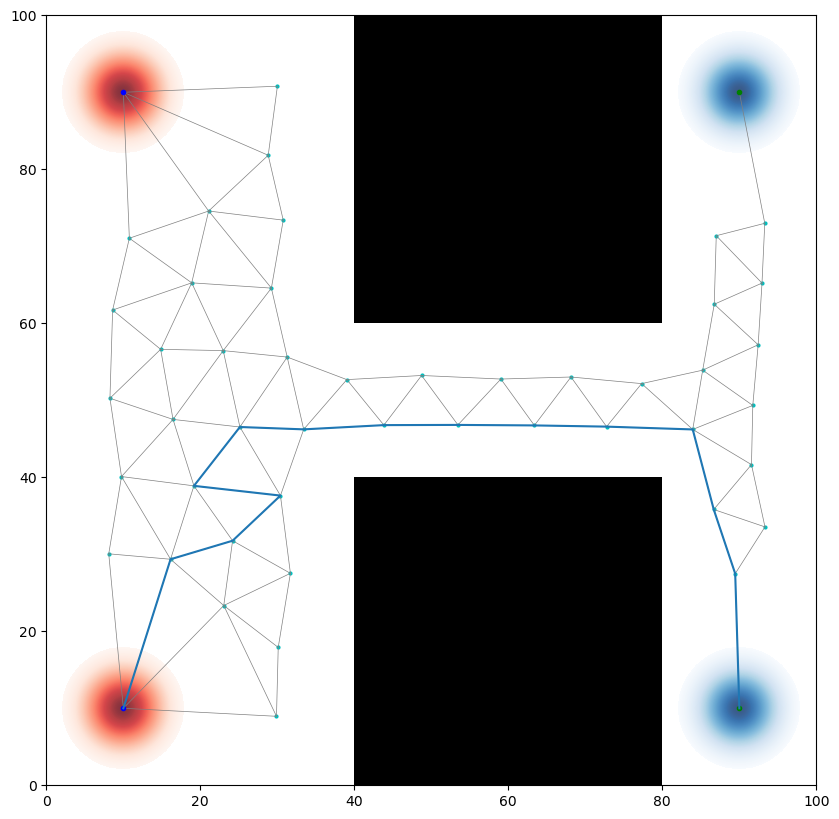

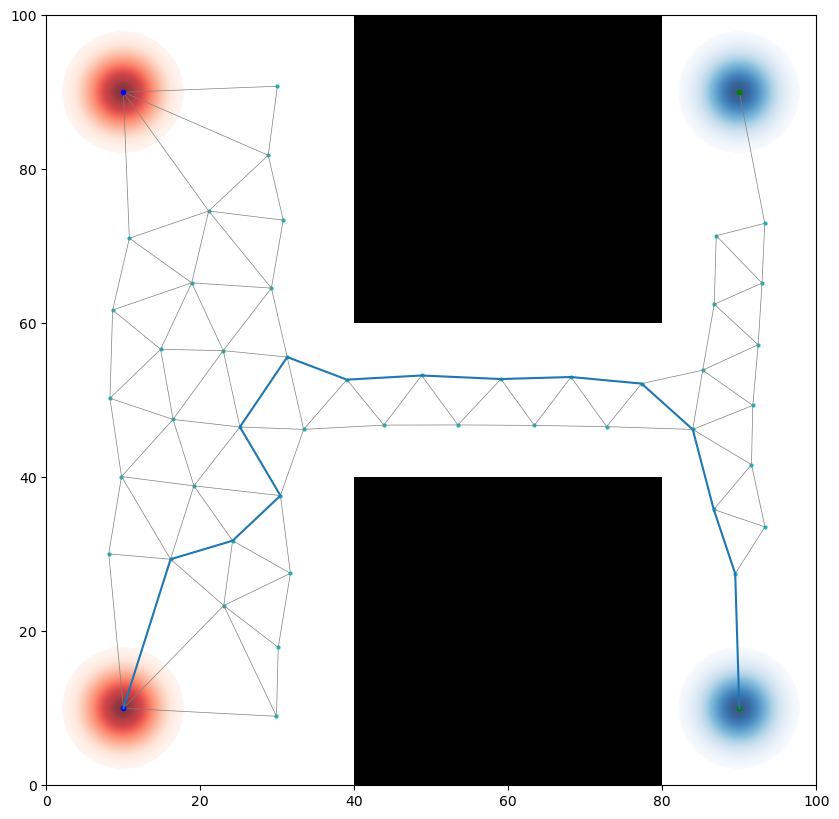

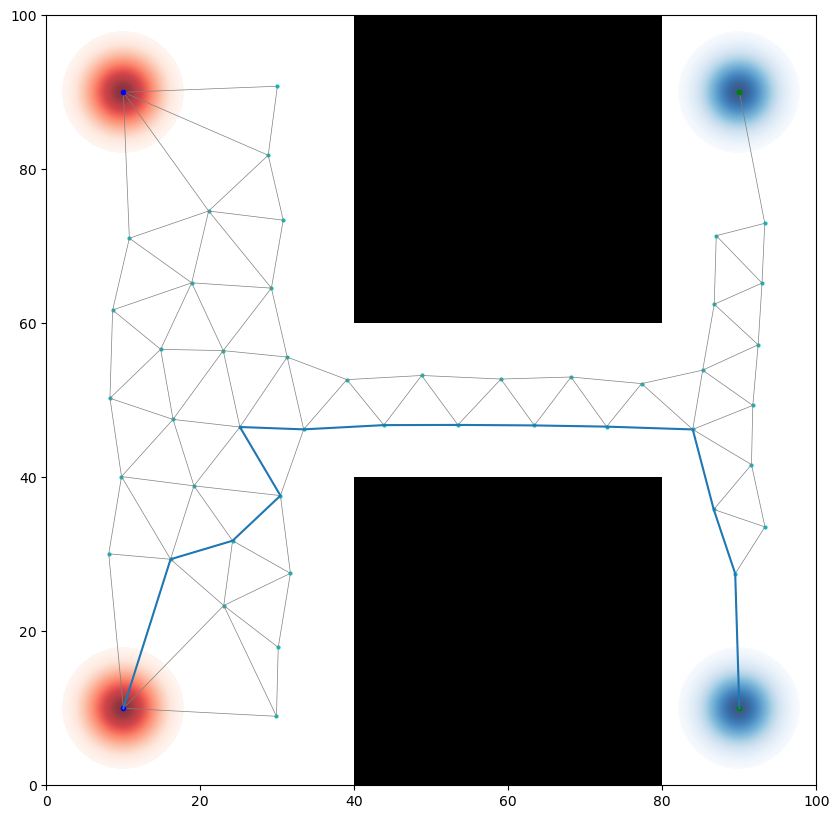

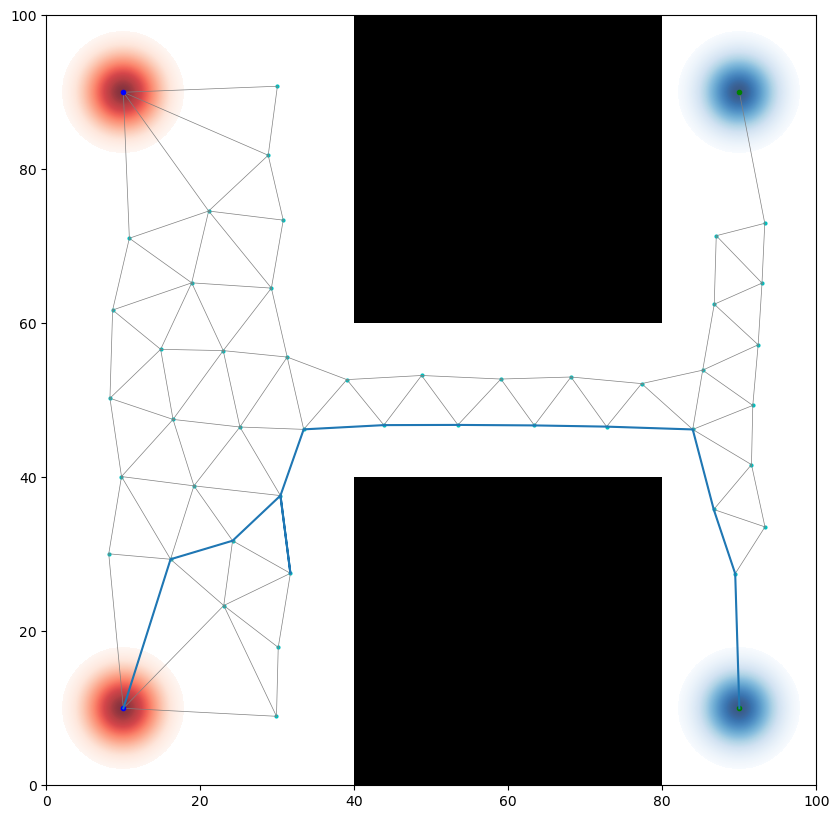

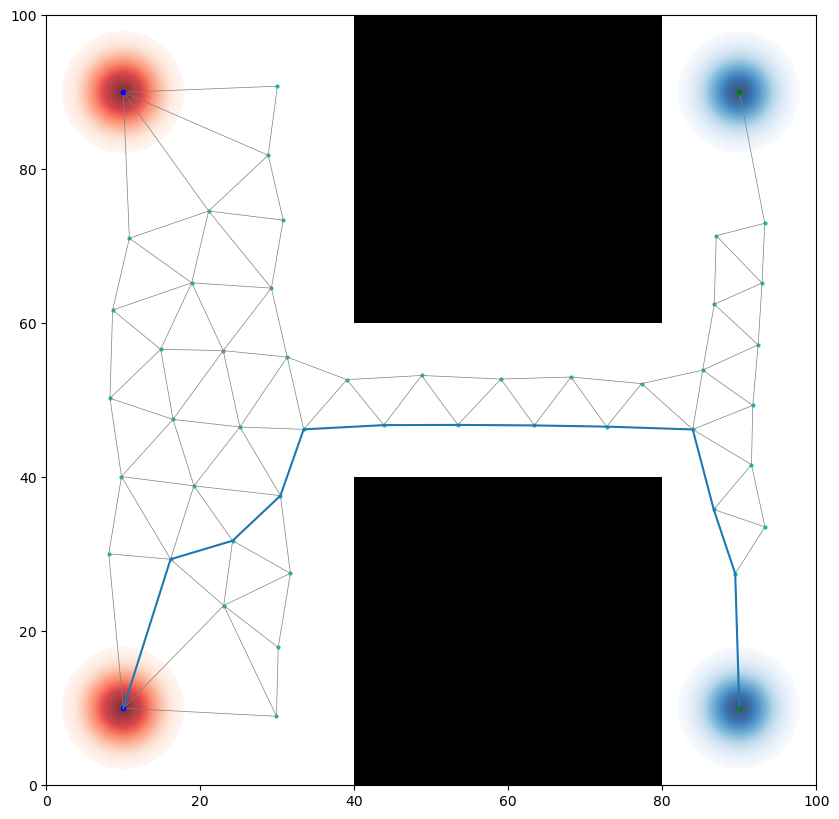

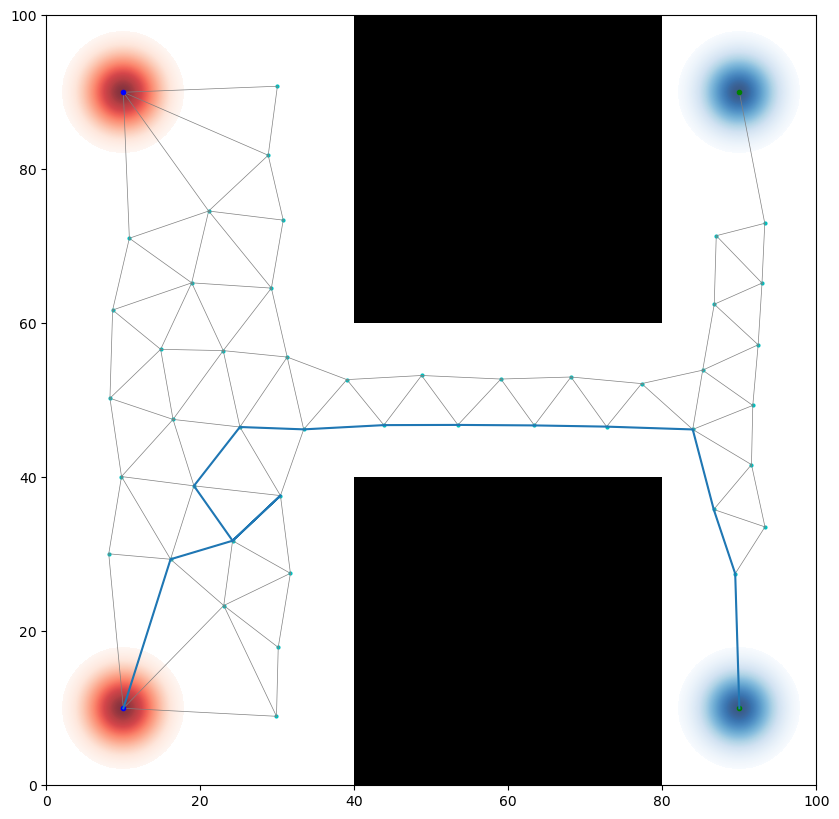

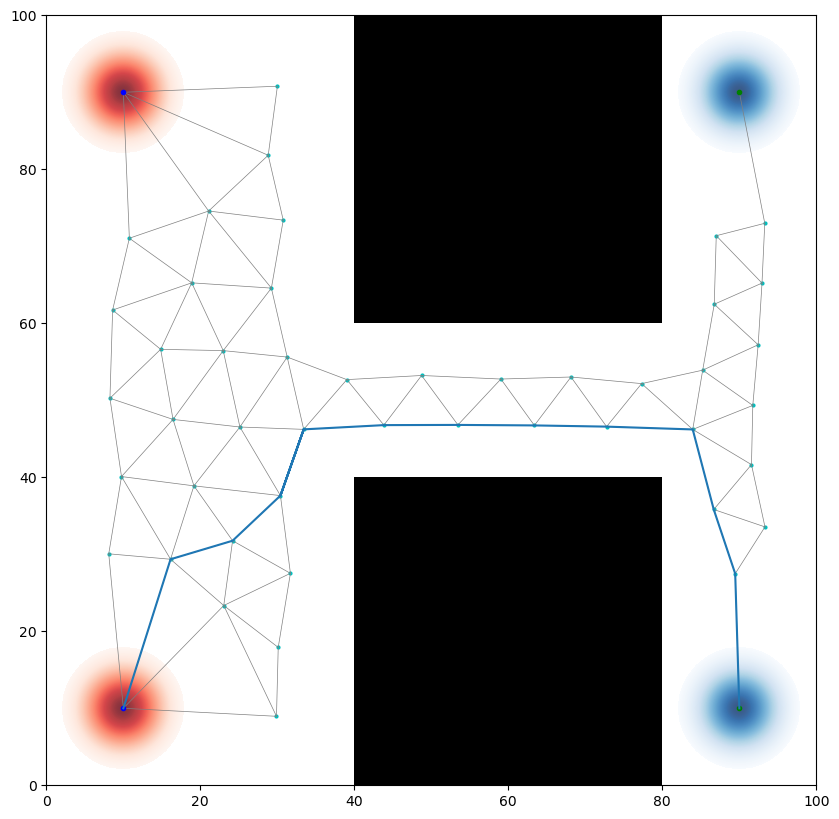

In [9]:
import matplotlib.pyplot as plt


for agent in range(num_agents):
    fig, ax = gaussian_prm.visualize_roadmap()
    locations = [gaussian_prm.samples[location_idx[agent]] for location_idx in path]

    x = [loc[0] for loc in locations]
    y = [loc[1] for loc in locations]
    ax.plot(x, y, "-")
    plt.show()
